___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew #how they residuals are distributed
#The skew function is used to calculate the skewness of a dataset.

from sklearn.model_selection import cross_validate

import warnings #Warnings are messages about errors, #ignore specific warning messages.
warnings.filterwarnings('ignore') #It allows you to specify how warnings should be displayed or handled

plt.rcParams["figure.figsize"] = (7,4) # figures are displayed with a specific size by default.

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

pd.options.display.float_format = '{:.3f}'.format # It formats the numbers to have three decimal places.

In [2]:
#!pip install -U scikit-learn

In [3]:
import numpy as np
np.__version__  # np version : 1.23.5

'1.21.5'

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

In [5]:
df = pd.read_csv("/Users/nada/Downloads/Ready_to_ML.csv")

In [6]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,Yes,120200.000,Manual,Diesel,Dealer,1595.000,5.000,98.000,Front,Alloy wheels,1270.000,No,Cloth,2.000,efficient,6.000,75.000,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,Yes,5000.000,Automatic,Electric,Dealer,1.000,1.000,0.000,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.000,No,Part/Full Leather,1.000,efficient,0.000,215.000,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,Yes,18900.000,Automatic,Benzine,Dealer,1991.000,8.000,162.000,4WD,Alloy wheels,1555.000,No,Part/Full Leather,2.000,unefficient,2.000,310.000,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,Yes,18995.000,Automatic,Benzine,Dealer,1991.000,7.000,169.000,4WD,Sport seats,1455.000,No,Part/Full Leather,2.000,unefficient,2.000,225.000,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,Yes,197000.000,Automatic,Diesel,Dealer,2143.000,7.000,162.000,4WD,Alloy wheels,1545.000,No,Part/Full Leather,2.000,unefficient,7.000,100.000,4.900,Standard,Standard,Safety Premium Plus Package


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [8]:
df.describe() #show distribuation

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000
mean,23537.241,68863.812,1708.965,5.820,129.526,1425.205,1.460,5.166,118.414,5.532
std,20811.986,62794.146,772.440,1.417,54.255,307.387,0.853,4.655,65.642,2.220
min,490.000,0.000,0.000,1.000,0.000,347.000,1.000,0.000,33.000,0.000
25%,12490.000,19155.000,1248.000,5.000,105.000,1228.000,1.000,2.000,80.000,4.300
50%,18440.000,54000.000,1595.000,6.000,123.000,1375.000,1.000,4.000,100.000,5.200
75%,28330.000,100675.000,1969.000,6.000,150.000,1597.000,2.000,7.000,135.000,6.400
max,549000.000,667128.000,6300.000,8.000,399.000,3150.000,9.000,20.000,450.000,18.300


In [9]:
df.duplicated().sum()

1815

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.make_model.value_counts()

# In order for ML models to learn a data well, the data should contain all the details as possible.
# When we look at the number of brand models, we see that the number of models of some brands is very low.
# In order for ML models to accurately predict car prices on a brand-by-model basis,
# there must be enough observations from each brand and model. For this, we exclude brand models under 100 from our data.

Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   208
Dacia Lo

In [13]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

# We list the models with 100 or less observations.
# We will drop the observations of the models in this list from our data.

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', length=420)

In [14]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

# We pull all the models in the model list in order and find the indexes of the observations of these models first.
# We drop the indexes we find from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [15]:
df

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,"Alloy wheels, Automatically dimming interior m...",1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,"Alloy wheels, Automatically dimming interior m...",1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,Sport seats,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,Sport seats,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,Sport seats,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,Volvo,"1000 Brussel, BE",13000.000,Sedan,Used,No,114000.000,Manual,Diesel,Private seller,1969.000,6.000,94.000,Front,"All season tyres, Ambient lighting, Cargo barr...",1532.000,Yes,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
18193,Volvo S60,Volvo,"CALLE CATALUNYA, 37, 8520 LLERONA, ES",4999.000,Sedan,Used,Yes,166512.000,Manual,Benzine,Dealer,2521.000,5.000,145.000,Front,Alloy wheels,1550.000,No,Part/Full Leather,3.000,efficient,18.000,154.000,9.100,Standard,Standard,Safety Premium Package
18194,Volvo S90,Volvo,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES",37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,Alloy wheels,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,Volvo,"Sur rendez-vous, 5060 Sambreville, BE",7300.000,Sedan,Used,Yes,96000.000,Manual,Diesel,Dealer,1560.000,6.000,99.000,Front,"Alloy wheels, Automatically dimming interior m...",1356.000,Yes,Cloth,1.000,unefficient,11.000,84.000,3.800,Standard,Standard,Safety Premium Package


In [16]:
df.make_model.value_counts()

# We saw that models with less than 100 observations were dropped.

Renault Megane         825
SEAT Leon              757
Dacia Sandero          721
Hyundai i30            699
Opel Astra             634
Ford Mustang           572
Peugeot 308            536
Nissan Qashqai         484
Ford Focus             483
SEAT Ibiza             433
Volvo V40              430
Fiat Tipo              415
Fiat 500               413
Renault Clio           404
Ford Fiesta            392
Nissan Micra           380
Fiat 500X              373
Skoda Octavia          359
Opel Corsa             358
Dacia Duster           343
Toyota Yaris           323
Opel Insignia          290
Volvo C70              281
Peugeot 208            260
Skoda Fabia            246
Fiat 500C              238
Toyota Auris           231
Peugeot RCZ            220
Hyundai TUCSON         216
Peugeot 3008           215
Ford Kuga              208
Dacia Logan            197
Peugeot 508            194
Volvo XC60             192
Toyota Corolla         190
Skoda Superb           189
Skoda Scala            188
S

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18197 entries, 0 to 18196
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     18197 non-null  object 
 1   make                           18197 non-null  object 
 2   location                       18197 non-null  object 
 3   price                          18197 non-null  float64
 4   body_type                      18197 non-null  object 
 5   type                           18197 non-null  object 
 6   warranty                       18197 non-null  object 
 7   mileage                        18197 non-null  float64
 8   gearbox                        18197 non-null  object 
 9   fuel_type                      18197 non-null  object 
 10  seller                         18197 non-null  object 
 11  engine_size                    18197 non-null  float64
 12  gears                          18197 non-null 

## Feature Engineering

In [18]:
df.head(2)

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,"Alloy wheels, Automatically dimming interior m...",1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,"Alloy wheels, Automatically dimming interior m...",1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package


In [19]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

In [20]:
df.head(2)

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,"Alloy wheels, Automatically dimming interior m...",1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,"Alloy wheels, Automatically dimming interior m...",1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package


In [21]:
df_object = df.select_dtypes(include ="object").head()
df_object

# select_dtypes(include ="object") to filter only object type features

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,extras,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package


In [22]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

# With <30, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 70
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 6478
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


### Converting the Extras feature from object to numeric

In [23]:
df.extras.sample(10)

# Since we want our ML Model to give more weight to cars with more features,
# we will count the features here and assign the numbers we find
# to the places of the categorical features here.

549      Alloy wheels, Ambient lighting, Automatically ...
3998     Alloy wheels, Automatically dimming interior m...
11847                                         Alloy wheels
13149                             Roof rack, Voice Control
7916     Alloy wheels (15"), Ambient lighting, Awning, ...
1286     Alloy wheels (17"), Ambient lighting, Emergenc...
4613     Alloy wheels, Ambient lighting, Automatically ...
4227     Alloy wheels, Automatically dimming interior m...
11639                                         Alloy wheels
13823    Alloy wheels, Automatically dimming interior m...
Name: extras, dtype: object

In [24]:
df.extras.apply(lambda x: len(x.split(',')))

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

In [25]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feat.

In [26]:
df.head() # check extras feature turned into numeric

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,6,1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package


In [27]:
df.extras.nunique() # 6478 unique value --> reduced to 21 unique.

21

In [28]:
df.extras.unique()

#now extra column become numerical 

array([ 5,  6,  1,  2,  8,  7,  3,  4, 12,  9, 11, 10, 15, 13, 14, 16, 18,
       17, 19, 26, 20])

In [29]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

# When we examine these lists, type, comfort_&_convenience_Package, entertainment_&_media_Package,
# safety_&_security_Package features ordinalencoder other We see that we will apply
# onehotencoder transformation to featurs.

# OneHotEncoder:
# OneHotEncoder converts categorical features into dummies 0 and 1.
# If we want our model to treat all unique values under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

# OrdinalEncoder:
# if unique categorical data under a featurea have a hierarchical advantage over
# each other (good, bad, very bad or cheap, average, expensive, very expensive) etc.
# If we want the model to treat all observations according to their superiority,
# that is, not to treat them equally, we use the ordianlencoder conversion algorithm.

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Toyota RAV 4' 'Nissan Micra'
 'Nissan Qashqai' 'Nissan Juke' 'Nissan Pulsar' 'Nissan 370Z'
 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo'
 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai IONIQ'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 

In [30]:
#!pip install matplotlib==3.4

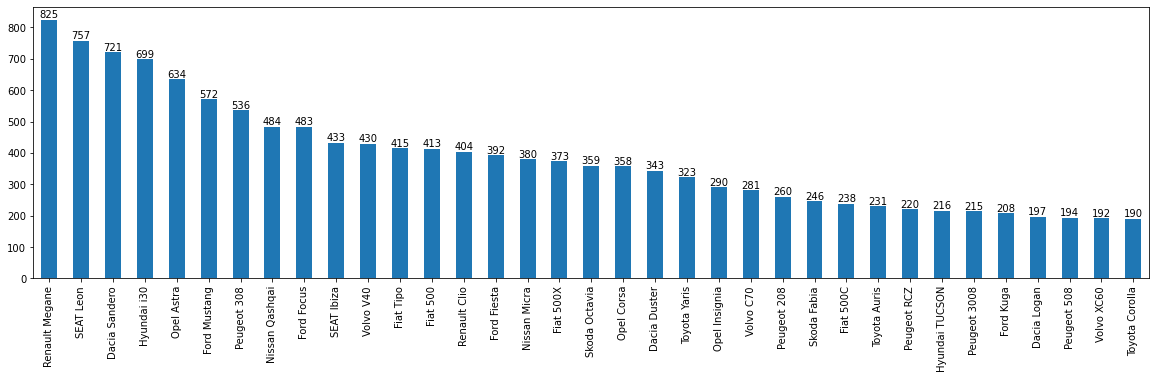

In [31]:
ax = df.make_model.value_counts().iloc[:35].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

# we see the top 35 models with the most observations in our data and their numbers.

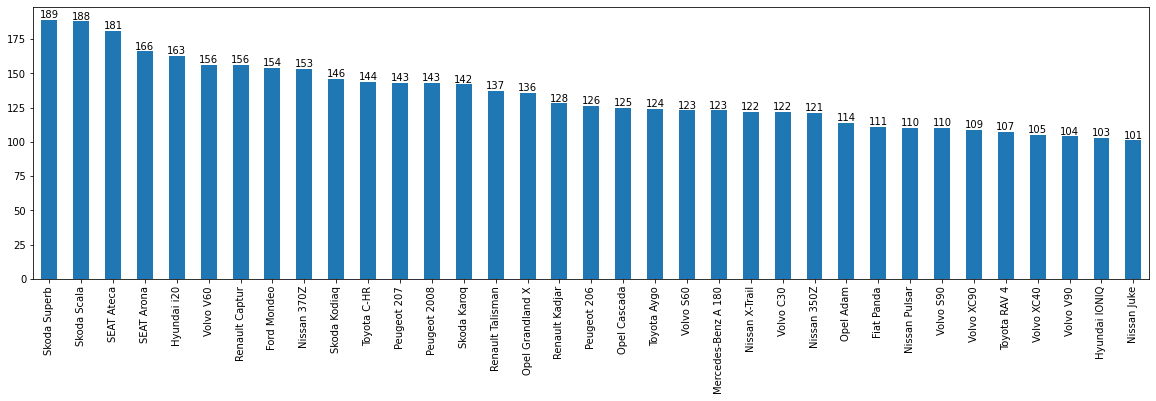

In [32]:
ax = df.make_model.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

# we see 35 models and numbers with the least observations in our data.

In [33]:
df2 = df.copy()

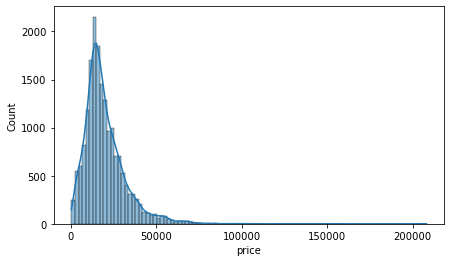

In [34]:
sns.histplot(df.price, bins=100, kde=True);

# Since linear models are very sensitive to outliers, I am trying to detect outliers in the data with histplot.
# Let's not forget that outlier for ML means that the data of a group or groups in our data is insufficient for training.
# By looking at the image below, we see that the number of vehicles over 70.000 EURO is very low.
# Based on this image, we can evaluate that the number of vehicles over 70 thousand EURO may be insufficient for training.
# However, we cannot understand whether it is inadequate or not without training.
# We should decide by both dropping the observations that we consider as outliers and
# comparing the scores by doing the training without dropping them.

# Also, looking at the histplot for all the data may mislead us about the outlier.
# For outlier detection, we should group the data in our data (Opel Astra, Ford Fiesta, Volvo S60 etc.)
# and determine the outlier accordingly.

In [35]:
skew(df.price)

2.473903804317343

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 720x432 with 0 Axes>

## multicollinearity control

In [ ]:
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

# Corr between +/-0.9 and +/-1. We can check multicollinearity for values with this snippet.

## Outliers in Price Column

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

# We can get insights about outliers via boxplot. However, these insights can mislead us.
# In order to make more accurate comments, we can use the stripplot showing the distribution
# of categorical data. Although boxplot treats cars priced at 50 thousand EURO and above as outliers,
# stripplot tells us that the number of cars priced at 50 thousand EURO and around is not very few.
# But as we said above, our evaluation is not for the data in general. We will do it according to
# the groups in the data (Opel Astra, Ford Fiesta, Volvo S60 etc.).

In [ ]:
#conda install -c anaconda ipywidgets

In [ ]:
df[df.make_model=="Volvo V60"]

In [ ]:
from ipywidgets import interact

def box_strip(model):
    sns.boxplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='bright')

    sns.stripplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='Set1')
model = df.make_model.unique()
interact(box_strip, model=model);

# This code defines the function to plot an interactive boxplot and stripplot using the ipywidgets and seaborn libraries.
# The function superimposes the boxplot and stripplot graph showing the prices of different car models covered by the data.
# The interact() function allows the box_strip function to run by selecting the user through the interface.
# This selection determines the car model that will be used to draw the graph.

In [ ]:
df.make_model.unique()

# unique groups in our data

In [ ]:
df[df["make_model"]== "Mercedes-Benz A 180"]["price"]

# Prices of Mercedes-Benz A 180s. We will try to determine the outlier values for each car using this code.

In [ ]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))
#to determine the outlier of each group
# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### OneHotEncoder

#### Example

In [ ]:
import sklearn
sklearn.__version__


In [ ]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

#this dataset for Clarification > encoder

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas") # sparse depricated if u use >=1.2 version. instead use sparse_output


# OneHotEncoder converts categorical features into dummies 0 and 1 features. If we want our model to treat
# all unique values under the categorical feature equally, we convert our categorical data to 0 and 1 using
# the onehotencoder conversion algorithm. We could also use the get_dummies() function for this conversion,
# but since applying get_dummies() to all data and then separating the data into train and test sets will
# cause data leakege, categorical observations for the data we prepared for ML models dummies features must be
# done with the onehotencoder conversion algorithm.

# However, when converting to categorical data, the following should not be forgotten:
# if there is a hierarchical superiority or ranking (expensive, normal, cheap or Large, average, small, etc.)
# among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.

# Conversion of categorical data to dummies features is done according to the unique categorical data in
# the train set where the fit operation is performed. With the handle_unknown = "ignore" parameter,
# all categorical data passed in the test set and not in the train set are converted to 0.
# The default for this parameter is handle_unknown = "error". If the handle_unknown parameter remains at
# its default value, the onehotencoder algorithm will fail for an observation that is in the test set but
# not in the train set.

# In sklearn 1.2 versions, with the set_output(transform="pandas") code,
# it transforms the outputs converted into array after conversion into a dataframe
# with the feature names of the data to which it is fitted.

In [ ]:
enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made
# according to the unique observations in the train set.

In [ ]:
enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1,
# while the non-observations (car) are converted to 0.

### OrdinalEncoder

#### Example

In [ ]:
data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.4, shuffle=False)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.
#good will be 2, bad 0, and worst 1, according to the order above 👆  

enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [ ]:
enc_2.fit_transform(X_train)

In [ ]:
enc_2.transform(X_test)

#ugly put it as -1, because it doesn’t know this value 

### Train | Test Split

In [ ]:
X= df.drop(columns="price")
y= df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Converting Object Features into Numerical Features Using Make Column Transformer

In [ ]:
df.select_dtypes(include="object").head(1)

In [ ]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_type,
                                                     cat_for_comfort,
                                                     cat_for_ent,
                                                     cat_for_safety]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the non-transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder<__>" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder<__>", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature<_>names_out=False.

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
X_train.shape, X_test.shape

In [ ]:
column_trans.fit_transform(X_train).head()

In [ ]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [ ]:
X_train_trans.shape, X_test_trans.shape # 24 features --> 110 features

In [ ]:
X_train_trans.head()

In [ ]:
X_test_trans.head()

In [ ]:
X_train_trans.join(y_train).corr()

In [ ]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

### Scaling

In [ ]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [ ]:
X_train_scaled.head()

In [ ]:
X_test_scaled.head()

## Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

In [ ]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

### Adjusted R2 Score

In [ ]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations
    p = X.shape[1] # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# If there are too many features in our data, but not enough rows, which makes a false improvement in our model's R2_score.
# Especially in such data or if too many new features (such as dummies feature) have been added to our data.
# We need to detect the real R2_score with adjusted R2_score.

# Adjusted R2_score Checks the trade off between the number of rows and the feature,
# and returns us a score. If there is a large imbalance between the numbers,
# there will be serious decreases in the adjusted_R2_score.

# We define the above function for Adjusted R2 Score.

In [ ]:
y_pred = lm.predict(X_test_scaled)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [ ]:
adj_r2(y_test, y_pred, X_test_scaled)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

### Cross Validate

In [ ]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

# As we learned in our previous lessons, we perform the overfiting control by comparing the train and
# validation scores we receive through cross validaition.

In [ ]:
pd.DataFrame(scores)

In [ ]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We see that the scores between the train and validaiton set and the train set are close to each other.
# There is no overfitting.

In [ ]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
4954/df.price.mean()

# According to the rmse score we get from the test set (hold out set) score we will give to the customer,
# our model makes an average of 24.7% error.

### Prediction Error with Outliers

In [ ]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# From prediciton error chart, we can see how good our model's predictions are. When we look at the image below,
# we can see that cars with prices of 70 thousand EURO and above are pulling our best fit line down.
# If I drop the very low-priced cars that I see from the data that break my scores,
# the cars with 70 thousand EURO and above, or the outlier-priced cars that I have determined on
# the basis of models from my data and retrain the model from this data, I can get better scores.

# We will continue to drop cars with very low prices and cars over 70.000 EURO in this notebook.

In [ ]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([0,20000])
plt.ylim([-10000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0,80000])
plt.show();

# We see that our model does not learn well about the car prices of 7500 EURO and below and over 70 thousand EURO.
# The question that immediately comes to our mind should be: What is the distribution of car prices below 7500 EURO
# and above 70 thousand EURO in the residual plot? We will look at the residual plot below and see
# if linear regression is a good choice for the determination of the car prices we mentioned.

### Residual Plot with Outliers

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# The data from the residual plot clearly shows that linear regression is not suitable for cheap and high priced cars.

In [ ]:
y_pred=lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();

# When we look at the residuals plot, we can see that the problem is that low-priced cars and high-priced cars
# that do not have a balanced distribution around the 0 axis disrupt the distribution in the residual plot.

# For this, we will drop the cars below 7500 EURO and above 70 thousand EURO,
# which the model made bad predictions above, from our data.
# Then we will observe our scores again.

## Filtering Data and Rebuilding The Model

In [ ]:
df = df[(df.price > 7500)&(df.price <70000)]
df

In [ ]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [ ]:
X_train= column_trans.fit_transform(X_train)
X_test= column_trans.transform(X_test)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

In [ ]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
3667/df.price.mean()

# While models made an average of 24.7% errors, this rate decreased to 17.2% after outlies were dropped.

### Prediction Error without Outliers

In [ ]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and
# the identity line narrows even more.

### Residual Plot without Outliers

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# for cars priced at or around 7500 EURO, although our scores have improved
# still not suitable for linear regression.

In [ ]:
model = LinearRegression()
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

# We are checking overfitting according to our new data.

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# Since train and test scores are close, we can say there is no overfitting.

In [ ]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

# Since the test scores we will present to the customer and the validation scores we get from the CV are close
# to each other, we can say that the scores we get from the test (hold out) set are consistent scores.

In [ ]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)

# We assign the scores to the variables to compare the scores we get from the linear model.

In [ ]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])
 # The coefficients of the features with onehot encoder applied are very high. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

# Dummy variable trap is a problem that occurs when the independent variables used in regression analysis are related
# to each other. This can occur as a result of deriving or extracting one argument from other arguments.

# Especially in multiple linear regression models, it is thought that all independent variables should be
# included in the model.
# However, when there is an exact relationship between some independent variables
# (that is, if a variable can be derived from the sum of other variables),
# problems may arise with the accuracy of the model. This may also be reflected in the significantly
# higher correlations in the correlation matrix of the independent variables.

# Dummy variable trap may occur, especially when adding categorical variables to models.
# Categorical variables, such as "gender" or "country", are often converted to dummy variables
# when added to the model. This means, for example, creating two different dummy variables
# "male" and "female" for the "gender" variable. However, in this case, the addition of both variables
# to the model may cause problems as they are variables that can be derived from each other.
# This occurs when a dummy variable can be derived from the sum of other dummy variables.

# In order to reduce the effect of the dummy variable trap, when transforming the unique categorical observations
# under each featura into dummies features, it can be eliminated by dropping 1 of these observations or
# applying regularization.

# The drop="first" parameter in the code OneHotEncoder(handle_unknown="ignore", sparse=False, drop="first"), cat_onehot)
# drops 1 unique categorical observation in each featur and is among the new dummies features.
# weakens the relationship. but drop="first" is not used when feature importance is to be made.
# Regularization is preferred.

## Pipeline

In [ ]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [ ]:
X_train.head()

In [ ]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_type, cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) # MinMaxScaler()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)

# What does pipe_model.fit(X,y) do here, respectively?
# The first operation in the pipe_model is column_trans;
# 1. Onehotencoder conversion is done to featurs (cat_onehot) in X data that will apply onehotencoder conversion.
# 2. Ordinalencoder conversion is done to featurs (cat_ordinal) in X data to
# which ordinalencoder conversion will be applied.
# 3. Except for the converted featurs, no action is taken on the remaining featurs, they are left as is.
# Since the second action in the pipe_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric X we get.
# Dummies featurs consisting of 0s and 1s in our data
# Since, minmaxscale was applied so that these observations remain 0 and 1 again.
# The third action in pipe_model is Lasso();
# 5. Transformed and scaled X together with y Lasso are given to the model and the training is completed.

## Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

In [ ]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

In [ ]:
3667/df.price.mean()

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

# Very important note: If you are doing a conversion to your data, make sure to use the pipeline in the CV process,
# otherwise the data leakage problem may occur.

# Since the use of a data that has been transformed into a CV will also cause data leakage,
# the original version of the data will be given to the CV, and the new train and new test sets in
# each iteration will be converted into numeric form in accordance with the pipeline steps and
# their scores will be taken in the CV.

# Remember that you have to do the CV process we did in the linear regression model with the pipeline.

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

## Finding best alpha for Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alpha_space = np.linspace(0.001, 100, 100)

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space} # Parameter names should be used together with the model name defined
                                           # in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

# Very important note: If you are doing a transformation to your data, make sure to use pipeline in gridsearch operation,
# otherwise data leakage problem may occur.

# Since the use of a transformed data in gridsearch will also cause data leakage, the original state of
# the data will be given to gridsearch, and the new train and new test sets in each iteration
# will be converted into numeric form in accordance with the pipeline steps and their scores will be taken in gridsearch.

# Remember that you have to do the gridsearch operation that we did in the linear regression model with the pipeline.

In [ ]:
pipe_model.get_params() # to see the parameters of the model defined with pipeline

In [ ]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    pipe_model, param_name="Ridge__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [ ]:
ridge_grid_model.fit(X_train, y_train)

In [ ]:
ridge_grid_model.best_estimator_

# hyper returns only values other than default from parameters. If our best alpha after gridsearch was 1,
# it wouldn't show 1 here.

In [ ]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
ridge_grid_model.best_estimator_["Ridge"].coef_



In [ ]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

In [ ]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_,
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

# In order to get the coefficients and feature names, the model and encoder name you know through
# the model created with the pipeline should be used as a key.

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

In [ ]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

## Finding best alpha for Lasso

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space} # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [ ]:
viz = ValidationCurve(
    model, param_name="Lasso__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [ ]:
lasso_grid_model.fit(X_train, y_train)

In [ ]:
lasso_grid_model.best_estimator_

In [ ]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_,
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

In [ ]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

## Finding best alpha and l1_ratio for ElasticNet

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [ ]:
elastic_grid_model.fit(X_train, y_train)

In [ ]:
elastic_grid_model.best_estimator_

In [ ]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)

## Feature İmportance

In [ ]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_,
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")

In [ ]:
df_feat_imp

#Which features are most influential in predicting the target variable?

In [ ]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp,
            x=df_feat_imp.Coef,
            y=df_feat_imp.index);

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(model,
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [ ]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

# we select the top 6 features that have the most impact on prediction. Here, a question may come up as
# "Why the make_model feature was chosen?". When the above image is examined, we also chose the make_model feature
# since we saw that the make_model feature has unique categorical observations (Audi A3, AudiA1, Renault Espace etc.)
# among the featurs that have the most impact on the prediction.

# Although the type feature does not contribute much to the prediction,
# it has been kept in the data in order to have a feature in our data that we will make the ordinal transformation>in pipeline.

In [ ]:
df_new

In [ ]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our data set with 5 new features, we determine our X and y and reconstruct the model.
# And we repeat the operations we did above.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

In [ ]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) #MinMaxScaler()

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

## Cross Validate

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

In [ ]:
3992/df_new.price.mean()

In [ ]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred,squared=False)

## 7. Visually Compare Models Performance In a Graph

In [ ]:
scores = {"linear_m": {"r2_score": lm_R2 ,
 "mae": lm_mae,
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2,
 "mae": rm_mae,
 "rmse": rm_rmse},

 "lasso_m": {"r2_score": lasm_R2,
 "mae": lasm_mae,
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2,
 "mae": em_mae,
 "rmse": em_rmse},

 "final_m": {"r2_score": fm_R2,
 "mae": fm_mae ,
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

# We assign the metrics we get from all models to the scores variable in jason format.
# Then we get the transpose of df so that the model names appear in the index and the metrics in the features.

In [ ]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # if our metric is r2_score the barplot will be sorted from largest to smallest
    else:
        ascending = True # if our metric is mae or rmse then barplot will be sorted from smallest to largest
    compare = scores.sort_values(by=j, ascending=ascending) # reorders compare df by corresponding metric
    ax = sns.barplot(x = compare[j] , y= compare.index) # The metric scores of compare[j] are drawn sequentially from compare df
                                                        # and visualized in the barplot.
                                                        # y=compare.index will write the model names on the y-axis of our image.
    ax.bar_label(ax.containers[0], fmt="%.4f"); # annotate It is arranged as 4 digits from ".".

## Final Model and Prediction new observation

In [ ]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score,
# we separate the data we use for this model as X and y.
# Note that we do not distinguish between train and test sets in the final stage.

In [ ]:
X.head()

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

# After comparing the scores in the table above, we decide on the Lasso model,
# which consists of 7 features, as our final model.
# In the lasso model with 7 features, we re-build the model with the hyperparameter, where we get the best score.

In [ ]:
final_model.fit(X, y)

# What does final_model.fit(X,y) do here, respectively?
# The first action in the final_model is column_trans;
# 1. Onehotencoder conversion is done to featurs (cat_onehot) in X data that will apply onehotencoder conversion.
# 2. Ordinalencoder conversion is done to featurs (cat_ordinal) in X data to which ordinalencoder conversion will be applied.
# 3. Except for the converted featurs, no action is taken on the remaining featurs, they are left as is.
# Since the second action in the final_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric X we get. Dummies features consisting of 0s and 1s in our data
# Since, minmaxscale was applied so that these observations remain 0 and 1 again.
# The third action in the final_model is Lasso();
# 5. Transformed and scaled X together with y Lasso are given to the model and the training is completed.

In [ ]:
X

In [ ]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [ ]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

In [ ]:
new_obs = pd.DataFrame([my_dict])
new_obs

# we found that the feature rankings are the same

In [ ]:
final_model.predict(new_obs)

In [ ]:
# when feature order is different

my_dict = {
    "type": "Used",
    "power_kW": 85,
    "make_model": 'Mercedes-Benz A 180',
    "engine_size": 1461,
    "mileage": 30000,
    "age": 3
}

new_obs = pd.DataFrame([my_dict])
new_obs

In [ ]:
final_model.predict(new_obs)

# new_obs and X's feature order is different. make_column_transformer detects this difference and adjusts
# the feature order of new_obs to the feature order of the X data it is training.

In [ ]:
# What does pipe_model.predict(new_obs) do in order?
# The first operation in the pipe_model is column_trans;
# 1. Onehotencoder conversion is performed according to the information of X data to the features(cat_onehot)
# to be applied onehotencoder conversion in new_obs data.
# 2. Ordinalencoder conversion is performed according to the information of X data to the features(cat_ordinal)
# in the new_obs data to be converted to ordinalencoder.
# 3. The new_obs data is left as is, without any action, except for the converted features.
# Since the second action in the pipe_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric new_obs according to
# the min and max information of the X data.
# The third action in the pipe_model is Lasso();
# 5. The new_obs data transformed and scaled according to X's information is predicted by the Lasso model.

In [ ]:
# Important note: make_column_transformer function assigns categorical features to the beginning of df
# and numeric features to the end of df in accordance with the transformation order in the df it transforms.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___